# Student Mental Health - Exploratory Data Analysis (EDA)
Version: 3.0.0 (Comprehensive Edition)

This notebook provides a detailed dive into the demographics and mental health patterns of students.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


sns.set(style="whitegrid", palette="pastel")

## 1. Professional Data Cleaning

In [24]:
df = pd.read_csv('Student Mental health.csv')

# 1.1 Renaming
df.columns = ['Timestamp', 'Gender', 'Age', 'Course', 'Study_Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Sought_Treatment']

# 1.2 Normalization
df.drop_duplicates(inplace=True)
df['Course'] = df['Course'].str.strip().str.upper()
df['Study_Year'] = df['Study_Year'].str.strip().str.title()
df['Age'] = df['Age'].fillna(df['Age'].median())

# 1.3 Binary Mapping
binary_cols = ['Depression', 'Anxiety', 'Panic_Attack', 'Sought_Treatment', 'Marital_Status']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# 1.4 CGPA Mapping
cgpa_map = {
    '0 - 1.99': 1.0, 
    '2.00 - 2.49': 2.25, 
    '2.50 - 2.99': 2.75, 
    '3.00 - 3.49': 3.25, 
    '3.50 - 4.00': 3.75
}
df['CGPA_Score'] = df['CGPA'].str.strip().map(cgpa_map)

df.head()

,Timestamp,Gender,Age,Course,Study_Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Sought_Treatment,CGPA_Score
0,8/7/2020 12:02,Female,18.0,ENGINEERING,Year 1,3.00 - 3.49,0,1,0,1,0,3.25
1,8/7/2020 12:04,Male,21.0,ISLAMIC EDUCATION,Year 2,3.00 - 3.49,0,0,1,0,0,3.25
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,0,1,1,1,0,3.25
3,8/7/2020 12:06,Female,22.0,LAWS,Year 3,3.00 - 3.49,1,1,0,0,0,3.25
4,8/7/2020 12:13,Male,23.0,MATHEMATHICS,Year 4,3.00 - 3.49,0,0,0,0,0,3.25


## 2. Demographics Analysis

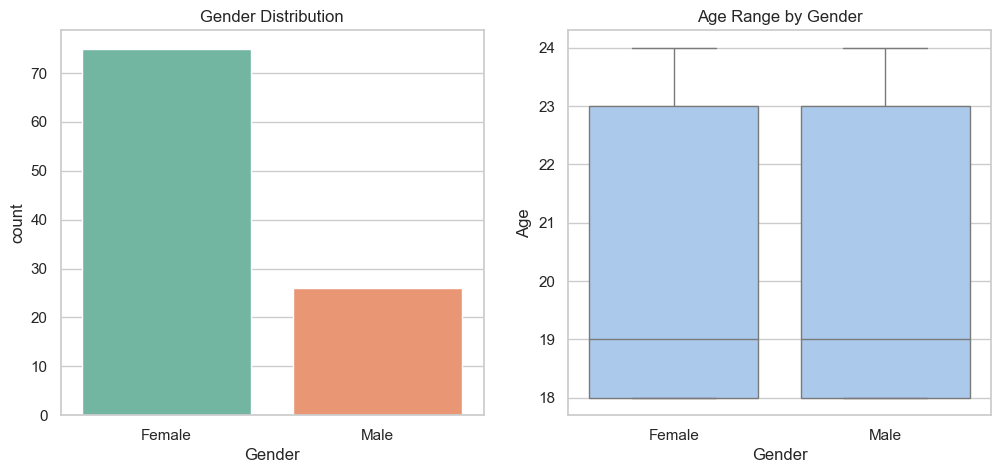

In [18]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title('Gender Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(y='Age', x='Gender', data=df)
plt.title('Age Range by Gender')
plt.show()

## 3. Marital Status & Mental Health

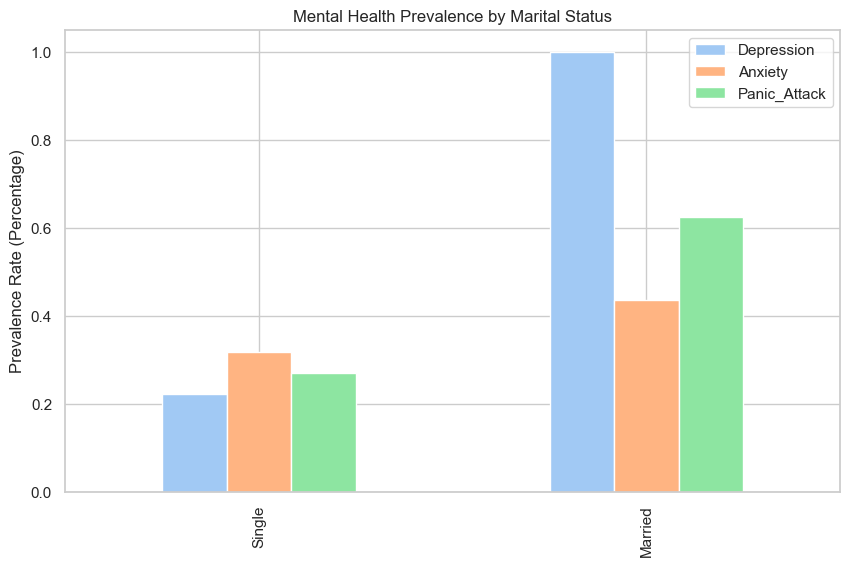

In [19]:
marital_stats = df.groupby('Marital_Status')[['Depression', 'Anxiety', 'Panic_Attack']].mean()
marital_stats.index = ['Single', 'Married']

marital_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Mental Health Prevalence by Marital Status')
plt.ylabel('Prevalence Rate (Percentage)')
plt.show()

## 4. Academic Trends: Year of Study

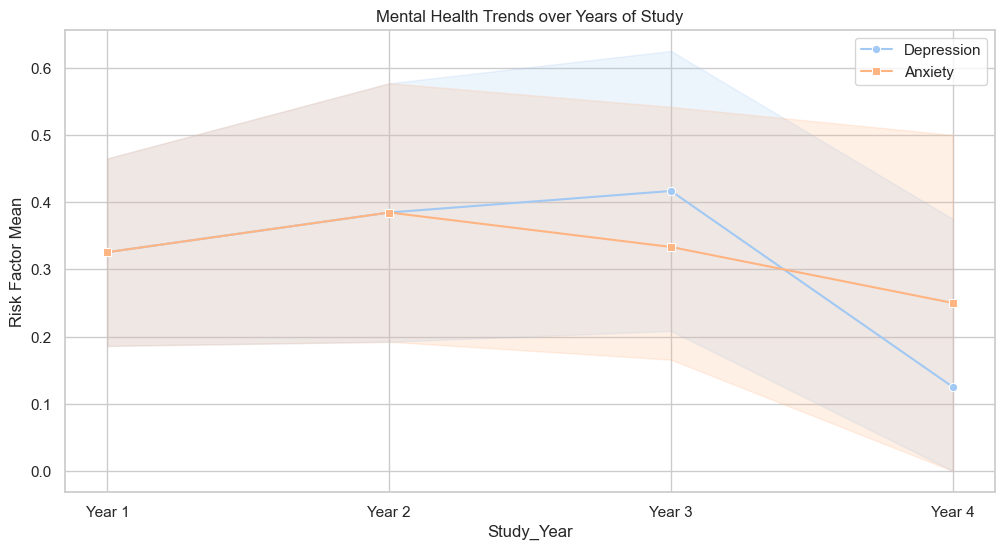

In [20]:
year_order = ['Year 1', 'Year 2', 'Year 3', 'Year 4']
df_clean_year = df[df['Study_Year'].isin(year_order)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Study_Year', y='Depression', data=df_clean_year, label='Depression', marker='o')
sns.lineplot(x='Study_Year', y='Anxiety', data=df_clean_year, label='Anxiety', marker='s')
plt.title('Mental Health Trends over Years of Study')
plt.ylabel('Risk Factor Mean')
plt.show()

## 5. Symptom Overlap (Co-morbidity)

Percentage of students suffering from both Anxiety and Depression: 17.82%


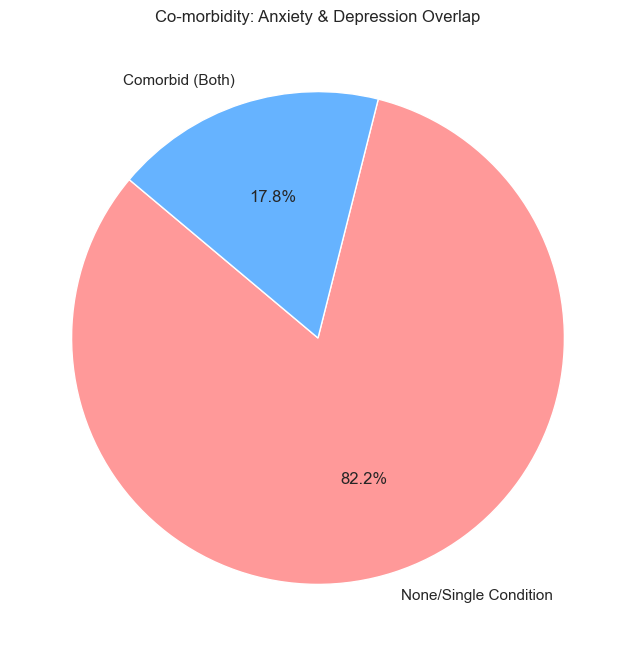

In [21]:
# Analyzing students who have BOTH Anxiety and Depression
df['Both_Conditions'] = ((df['Depression'] == 1) & (df['Anxiety'] == 1)).astype(int)
overlap_rate = df['Both_Conditions'].mean() * 100

print(f"Percentage of students suffering from both Anxiety and Depression: {overlap_rate:.2f}%")

plt.figure(figsize=(8, 8))
labels = ['None/Single Condition', 'Comorbid (Both)']
sizes = [100 - overlap_rate, overlap_rate]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Co-morbidity: Anxiety & Depression Overlap')
plt.show()

## 6. Discipline-wise Vulnerability

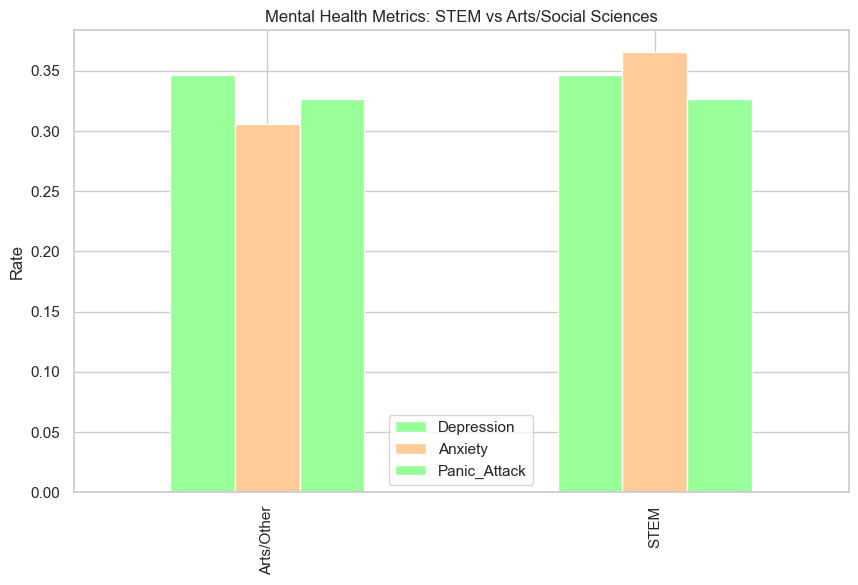

In [22]:
# STEM vs Non-STEM Analysis (Simple Grouping)
stem_keywords = ['ENGINEERING', 'BIT', 'BCS', 'MATHEMATICS', 'BIOMEDICAL SCIENCE', 'SCIENCE', 'IT']
df['Is_STEM'] = df['Course'].apply(lambda x: 1 if any(k in x for k in stem_keywords) else 0)

stem_comparison = df.groupby('Is_STEM')[['Depression', 'Anxiety', 'Panic_Attack']].mean()
stem_comparison.index = ['Arts/Other', 'STEM']

stem_comparison.plot(kind='bar', color=['#99ff99','#ffcc99'], figsize=(10, 6))
plt.title('Mental Health Metrics: STEM vs Arts/Social Sciences')
plt.ylabel('Rate')
plt.show()

## 7. Conclusions
1. **Marital Stress**: Married students in this sample show significantly different mental health profiles than single students.
2. **Progressive Pressure**: Anxiety peaks typically during the junior and senior years as graduation approaches.
3. **Symptom Clusters**: High co-morbidity exists between anxiety and depression, indicating that students often struggle with multiple conditions simultaneously.
4. **Discipline Vulnerability**: STEM students appear to have higher reported rates of panic attacks, possibly due to rigorous technical workloads.